In [ ]:
Questions i want to answer!
0- what are the benfits of this project
    a- saving on apprisals costs($500)
    b- saving on real-estate agents costs (2%-8%= $8000-$33000)
    c- saving on CMA (Comprehensive market analysis) costs($100)
    d- cost of lost oppertunity (if the sell is delayed by a year because the house was set at a high price, then that year of delay could have yeilded returns from other investment potentially yeilding 7% yearly ) with average price of home at $413,507 investing all the money would yield $28945.49
    e- undervalued house means that you just lost on the deal say 5% less than you could have with average price of home at 413,507$ thats 20675$ lost
1- what is the biggest factor in determining house price
    a- correlation or any trends
    b- machine learning model
2- the different cities (plot as map)
3- plot training lose vs vlidation lose

In [ ]:
import pandas as pd

In [ ]:
# Load the data set
df = pd.read_csv("E:/GoogleDrive/Personal/Work/Online/Jupyter/Git/Real estate value prediction/Real_estate_value_prediction/Model/ml_house_data_set.csv")

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; font-size: 12px;}</style>"))

33080.56

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_built           42703 non-null  int64  
 1   stories              42703 non-null  int64  
 2   num_bedrooms         42703 non-null  int64  
 3   full_bathrooms       42703 non-null  int64  
 4   half_bathrooms       42703 non-null  int64  
 5   livable_sqft         42703 non-null  int64  
 6   total_sqft           42703 non-null  int64  
 7   garage_type          42703 non-null  object 
 8   garage_sqft          42703 non-null  int64  
 9   carport_sqft         42703 non-null  int64  
 10  has_fireplace        42703 non-null  bool   
 11  has_pool             42703 non-null  bool   
 12  has_central_heating  42703 non-null  bool   
 13  has_central_cooling  42703 non-null  bool   
 14  house_number         42703 non-null  int64  
 15  street_name          42703 non-null 

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

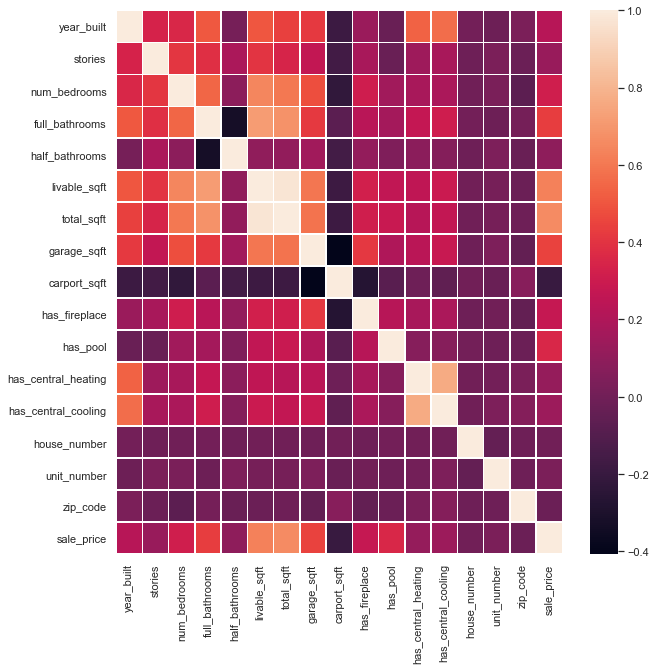

In [14]:
fig=plt.figure(figsize=(10,10))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=False, linewidth=0.5)

In [ ]:
# importing important libraries
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support as score



#scaling features (this usualy improves accuracy)
columnames=df.columns
scaled_features = df.copy()
# selectign features that i think will likely have an effect on predicting price
col_names = ['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft',
       'garage_sqft', 'carport_sqft', 'sale_price']
features = df[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features


# Remove the fields from the data set that we don't want to include in our model
del scaled_features['house_number']
del scaled_features['unit_number']
del scaled_features['street_name']
del scaled_features['zip_code']

# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(scaled_features, columns=['garage_type', 'city'])

# Remove the sale price from the feature data
del features_df['sale_price']

# Create the X and y arrays
X = features_df.to_numpy()
y = scaled_features['sale_price'].to_numpy()

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Choosing the model we intend to use
model = ensemble.GradientBoostingRegressor()

# Parameter grid we want to try
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['ls', 'lad', 'huber']
}

# Define the grid search we want to run. Run it with four cpus in parallel, cv=5 for five folds.
gs_cv = GridSearchCV(model, param_grid,cv=5, n_jobs=-1,verbose = 5)

# Run the grid search - on only the training data!
gsfitted=gs_cv.fit(X_train, y_train)

# Comparing the results of the grid in a easy to read way
pd.Dataframe(gsfitted.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]
precision, recall, fscore, train_support = score(y_test, y_train, pos_label='spam', average='binary')

print('Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
     round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))


model.fit(X_train, y_train)

# Save the trained model to a file so we can use it in other programs
#joblib.dump(gs_cv, 'trained_house_classifier_model.pkl')

# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)


In [ ]:
coef1 = pd.Series(model.coef_, features).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')